### Ищенко А.С. ИУ5-65Б Лабораторная работа № 6 "Анализ и прогнозирование временного ряда"

### Цель лабораторной работы: 
Изучение основных методов анализа и прогнозирование временных рядов.

### Задание:
Выберите набор данных (датасет) для решения задачи прогнозирования временного ряда.

Визуализируйте временной ряд и его основные характеристики.

Разделите временной ряд на обучающую и тестовую выборку.

Произведите прогнозирование временного ряда с использованием как минимум двух методов.

Визуализируйте тестовую выборку и каждый из прогнозов.

Оцените качество прогноза в каждом случае с помощью метрик.

## Временные ряды

### Анализ временных рядов

#### Импорт данных и работа в библиотеке Pandas

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import warnings
warnings.simplefilter(action = 'ignore', category = Warning)

In [2]:
# импортируем файл с данными о пассажирах
passengers = pd.read_csv("passengers.csv")
passengers.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
# превратим дату в индекс и сделаем изменение постоянным
passengers.set_index('Month', inplace = True)
passengers.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [4]:
# превратим дату (наш индекс) в объект datetime
passengers.index = pd.to_datetime(passengers.index)

# посмотрим на первые пять дат и на тип данных
passengers.index[:5]

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [5]:
# все это можно сделать в одну строчку с помощью parse_dates = True
passengers = pd.read_csv("passengers.csv", index_col = 'Month', parse_dates = True)
passengers.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
# сделаем срез по дате, например, с августа 1949 по март 1950 года
passengers['1949-08':'1950-03']

,#Passengers
Month,
1949-08-01,148
1949-09-01,136
1949-10-01,119
1949-11-01,104
1949-12-01,118
1950-01-01,115
1950-02-01,126
1950-03-01,141


#### Изменение шага временного ряда, сдвиг и скользящее среднее

In [7]:
# изменим шаг наших данных; например, посмотрим средние данные по годам
passengers.resample(rule = 'AS').mean().head()

,#Passengers
Month,
1949-01-01,126.666667
1950-01-01,139.666667
1951-01-01,170.166667
1952-01-01,197.000000
1953-01-01,225.000000


In [8]:
# произведем сдвиг на два периода (в данном случае месяца) вперед
passengers.shift(2, axis = 0).head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,112.0
1949-04-01,118.0
1949-05-01,132.0


In [9]:
# рассчитаем скользящее среднее для трех предыдущих месяцев
passengers.rolling(window = 3).mean().head()

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,120.666667
1949-04-01,126.333333
1949-05-01,127.333333


#### Построение графиков

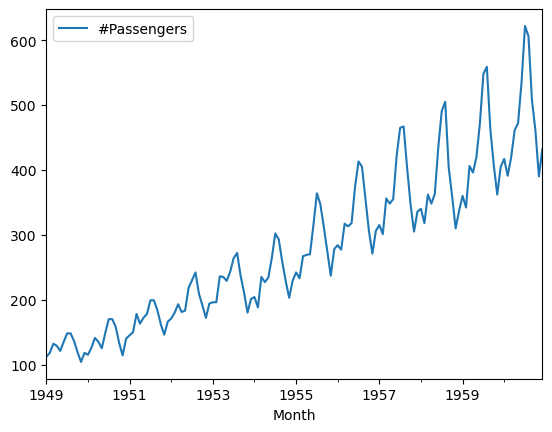

In [10]:
# построим простой график изменения данных во времени прямо в библиотеке Pandas
passengers.plot();

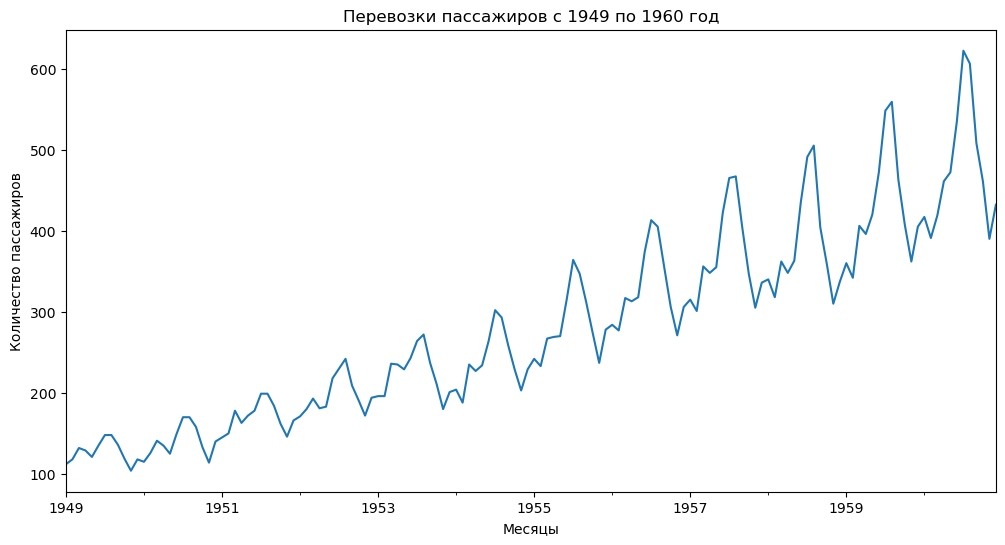

In [11]:
# изменим размер графика, уберем легенду и добавим подписи
ax = passengers.plot(figsize = (12,6), legend = None)
ax.set(title = 'Перевозки пассажиров с 1949 по 1960 год', xlabel = 'Месяцы', ylabel = 'Количество пассажиров');

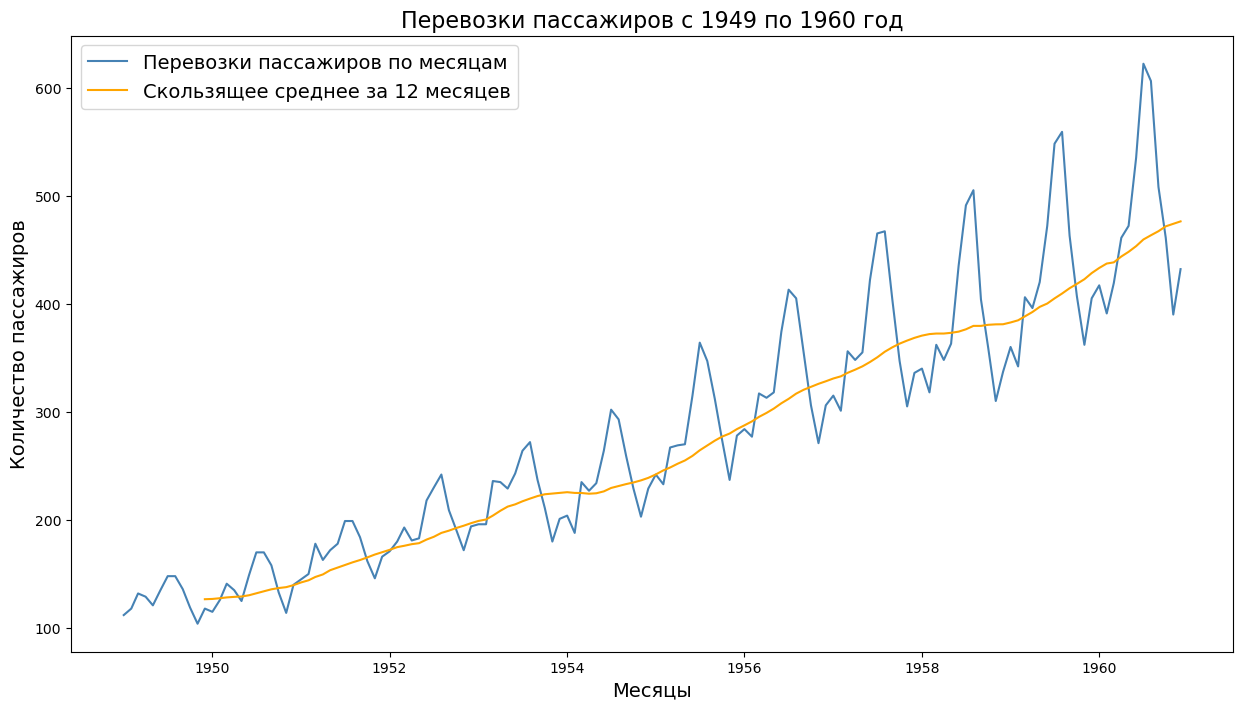

In [12]:
# зададим размер графика
plt.figure(figsize = (15,8))

# поочередно зададим кривые (перевозки и скользящее среднее) с подписями и цветом
plt.plot(passengers, label = 'Перевозки пассажиров по месяцам', color = 'steelblue')
plt.plot(passengers.rolling(window = 12).mean(), label = 'Скользящее среднее за 12 месяцев', color = 'orange')

# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)

# добавим подписи к осям и заголовки
plt.xlabel('Месяцы', fontsize = 14)
plt.ylabel('Количество пассажиров', fontsize = 14)
plt.title('Перевозки пассажиров с 1949 по 1960 год', fontsize = 16)

# выведем обе кривые на одном графике
plt.show()

## Моделирование и построение прогноза

Разбиение на тестовую и обучающую выборки

In [13]:
# разобьём данные на обучающую и тестовую выборки

# обучающая выборка будет включать данные до декабря 1959 года включительно
train = passengers[:'1959-12']

# тестовая выборка начнется с января 1960 года (по сути, один год)
test = passengers['1960-01':]

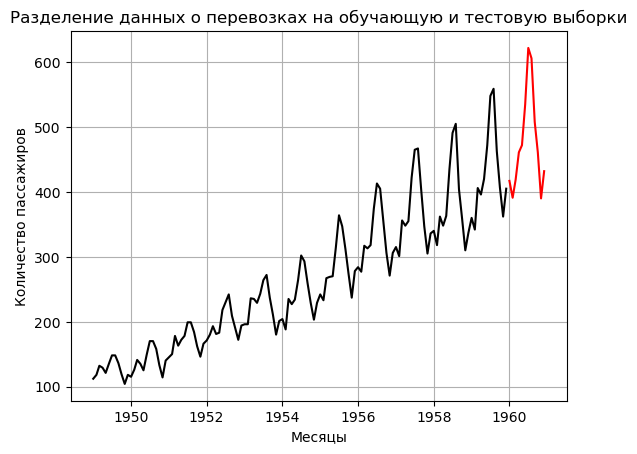

In [14]:
# выведем эти данные на графике
plt.plot(train, color = "black")
plt.plot(test, color = "red")

# заголовок и подписи к осям
plt.title('Разделение данных о перевозках на обучающую и тестовую выборки')
plt.ylabel('Количество пассажиров')
plt.xlabel('Месяцы')

# добавим сетку
plt.grid()

plt.show()

### Exponential Smoothing

/Users/sergejadolevic/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


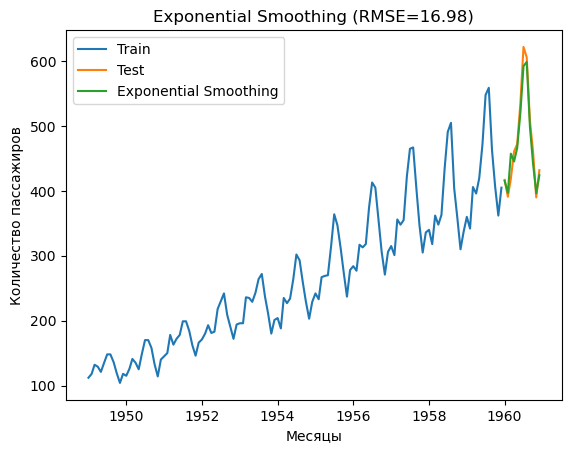

In [15]:
from statsmodels.tsa.api import ExponentialSmoothing
# обучение модели ExponentialSmoothing
model = ExponentialSmoothing(train['#Passengers'], trend='add', seasonal='add', seasonal_periods=12)
fit = model.fit()

# прогнозирование значений на тестовой выборке
pred = fit.forecast(len(test))

# вычисление среднеквадратичной ошибки (RMSE)
rmse = np.sqrt(mean_squared_error(test['#Passengers'], pred))

# отображение результатов прогнозирования на графике
plt.plot(train['#Passengers'], label='Train')
plt.plot(test['#Passengers'], label='Test')
plt.plot(pred, label='Exponential Smoothing')
plt.legend(loc='best')
plt.ylabel('Количество пассажиров')
plt.xlabel('Месяцы')
plt.title(f'Exponential Smoothing (RMSE={rmse:.2f})')
plt.show()

### SARIMA

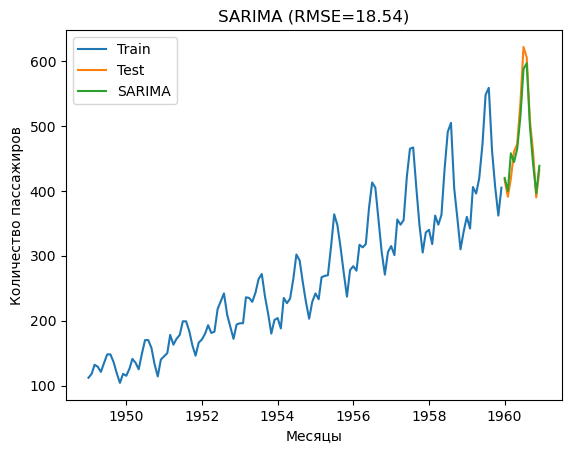

In [16]:
from pmdarima.arima import auto_arima
import pmdarima as pm

# обучение модели SARIMA
model_sarima = auto_arima(train['#Passengers'], seasonal=True, m=12)
fit_sarima = model_sarima.fit(train['#Passengers'])

# прогнозирование значений на тестовой выборке
pred_sarima = fit_sarima.predict(len(test))

# вычисление среднеквадратичной ошибки (RMSE)
rmse_sarima = np.sqrt(mean_squared_error(test['#Passengers'], pred_sarima))

# отображение результатов прогнозирования на графике
plt.plot(train['#Passengers'], label='Train')
plt.plot(test['#Passengers'], label='Test')
plt.plot(pred_sarima, label='SARIMA')
plt.legend(loc='best')
plt.ylabel('Количество пассажиров')
plt.xlabel('Месяцы')
plt.title(f'SARIMA (RMSE={rmse_sarima:.2f})')
plt.show()

### Model Evaluation Metrics

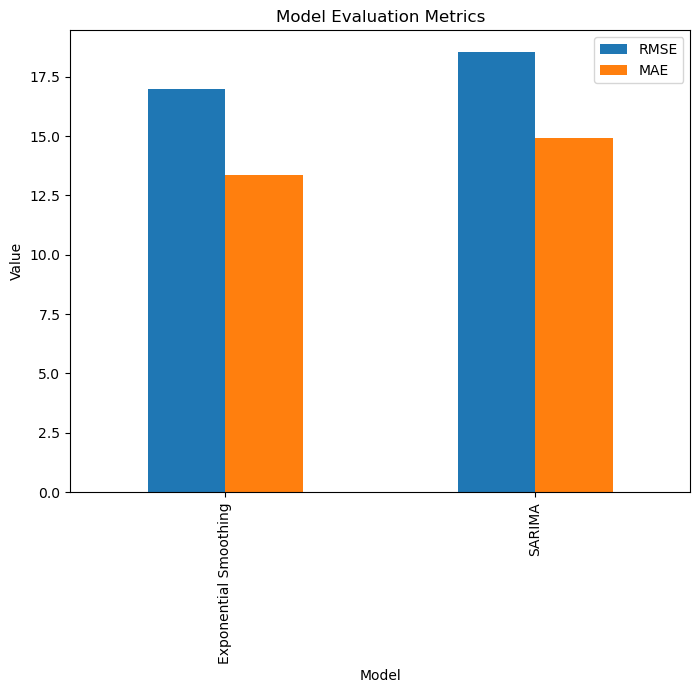

In [17]:
# вычисление метрик RMSE и MAE для модели Exponential Smoothing
rmse_es = np.sqrt(mean_squared_error(test['#Passengers'], pred))
mae_es = np.mean(np.abs(test['#Passengers'] - pred))

# вычисление метрик RMSE и MAE для модели SARIMA
rmse_sarima = np.sqrt(mean_squared_error(test['#Passengers'], pred_sarima))
mae_sarima = np.mean(np.abs(test['#Passengers'] - pred_sarima))

# визуализация метрик RMSE и MAE
fig, ax = plt.subplots(figsize=(8, 6))
metrics = pd.DataFrame({'Model': ['Exponential Smoothing', 'SARIMA'], 'RMSE': [rmse_es, rmse_sarima], 'MAE': [mae_es, mae_sarima]})
metrics = metrics.set_index('Model')
metrics.plot(kind='bar', ax=ax)
plt.title('Model Evaluation Metrics')
plt.xlabel('Model')
plt.ylabel('Value')
plt.show()

Exponential Smoothing является методом прогнозирования, который учитывает тренд и сезонность в данных. Он основывается на том, что будущие значения ряда зависят от его предыдущих значений, при этом больший вес уделяется более близким по времени значениям. Этот метод использует экспоненциальное усреднение для оценки тренда и сезонности.

SARIMA (Seasonal Autoregressive Integrated Moving Average) также учитывает тренд и сезонность в данных, но использует более сложную модель, которая включает в себя авторегрессионную и скользящую среднюю составляющие, а также интегрирование данных для обеспечения стационарности ряда.